In [ ]:
import numpy as np
import pandas as pd

import yfinance as yf

import tensorflow as tf

import datetime as dt
 
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 

from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt

In [ ]:
start = dt.datetime(2015,1,1)
today = dt.datetime(2021,12,31)
def load_data(ticker):
    data = yf.download(ticker, start, today)
    data.reset_index(inplace=True)
    return data

In [ ]:
df = load_data('MSFT')

[*********************100%***********************]  1 of 1 completed


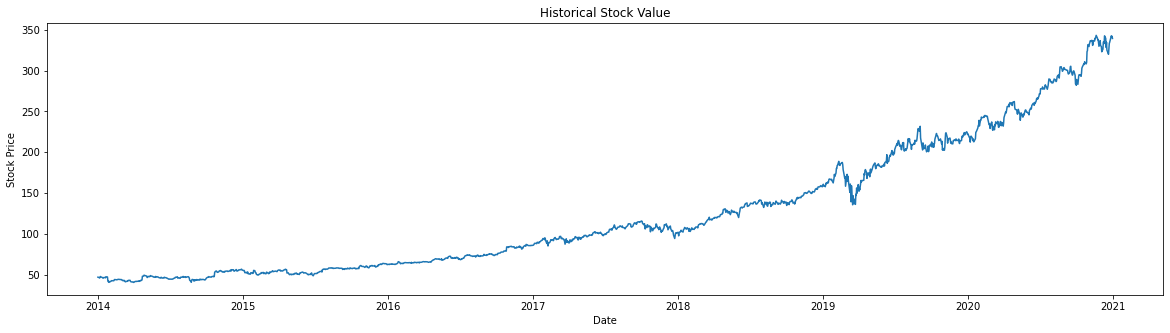

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df['Date'],df['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [ ]:
data = df.copy()

In [ ]:
data.shape

(1762, 7)

In [ ]:
temp_set = df[['Date','Close']]
training_set = temp_set.iloc[:1500,1:2].values
test_set = temp_set.iloc[1500:,1:2].values

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(60, 1500):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [30]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.SimpleRNN(units = 50, activation = 'tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.SimpleRNN(units = 50))
model.add(tf.keras.layers.Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 60, 50)            2600      
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 50)                5050      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7,701
Trainable params: 7,701
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
45/45 [==============================] - 2s 20ms/step - loss: 0.0442
Epoch 2/50
45/45 [==============================] - 1s 20ms/step - loss: 0.0054
Epoch 3/50
45/45 [==============================] - 1s 21ms/step - loss: 0.0031
Epoch 4/50
45/45 [==============================] - 1s 21ms/step - loss: 0.0022
Epoch 5/50
45/45 [==============================] - 1s 20ms/step - loss: 0.0019
Epoch 6/50
45/45 [==============================] - 1s 21ms/step - loss: 0.0016
Epoch 7/50
45/45 [==============================] - 1s 21ms/step - loss: 0.0013
Epoch 8/50
45/45 [==============================] - 1s 20ms/step - loss: 0.0013
Epoch 9/50
45/45 [==============================] - 1s 20ms/step - loss: 0.0012
Epoch 10/50
45/45 [==============================] - 1s 20ms/step - loss: 0.0011
Epoch 11/50
45/45 [==============================] - 1s 20ms/step - loss: 9.8890e-04
Epoch 12/50
45/45 [==============================] - 1s 20ms/step - loss: 9.1161e-04
Epoch 13/50
45/45 [==========

In [32]:
testdataframe= yf.download('MSFT',dt.datetime(2021,1,1),dt.date.today())
testdataframe.reset_index(inplace=True)
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata[['Date','Close']]
dataset_total = pd.concat((data['Close'], testdata['Close']), axis = 0)

[*********************100%***********************]  1 of 1 completed


In [33]:
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 447):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [34]:
real_stock_price.shape

(447, 2)

In [35]:
dataset_total.shape

(2209,)

In [39]:
predicted = model.predict(X_test)

In [40]:
predicted.shape

(387, 1)

In [41]:
predicted = sc.inverse_transform(predicted)

In [42]:
predicted

array([[300.8598 ],
       [267.66928],
       [228.2208 ],
       [209.72774],
       [203.78015],
       [214.19914],
       [211.33484],
       [219.46463],
       [225.11665],
       [225.67738],
       [227.39883],
       [223.81946],
       [224.31577],
       [240.50623],
       [238.47256],
       [239.50444],
       [234.14761],
       [234.22273],
       [234.8314 ],
       [240.87619],
       [246.11758],
       [245.89693],
       [249.36508],
       [252.95392],
       [251.02303],
       [247.9032 ],
       [246.87134],
       [240.59233],
       [244.57477],
       [244.46342],
       [245.22267],
       [245.68044],
       [244.93645],
       [244.49684],
       [242.99196],
       [238.18947],
       [238.43582],
       [234.77779],
       [232.93071],
       [235.66383],
       [234.73889],
       [233.32951],
       [230.36818],
       [233.6753 ],
       [236.00258],
       [238.89847],
       [241.07048],
       [241.37982],
       [241.06824],
       [240.84637],


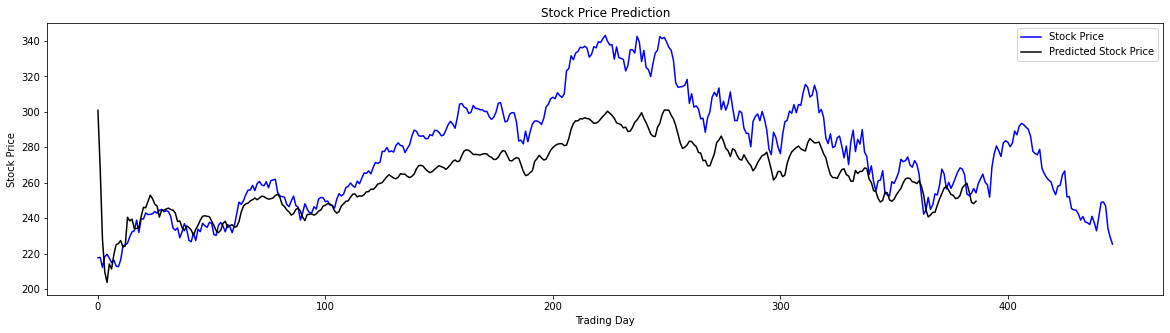

In [43]:
plt.figure(figsize=(20,5))
plt.plot(real_stock_price['Close'], color = 'blue', label = 'Stock Price')
plt.plot(predicted, color = 'black', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price')
plt.legend()
plt.show()